# **Y para que se pueden usar las SVM?**

**Este ejemplo usa reconocimiento facial**
* Usaremos un dataset de caras ya etiquetadas _(incluido en sckit-learn)_
* Vamos a crear una forma de clasificar caras en base al SVM

# Reconocimiento Facial

In [1]:
from sklearn.datasets import fetch_lfw_people #dataset con las caras
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [5]:
print(faces.images.shape) #cuantas fotos en total bajo?

(1348, 62, 47)


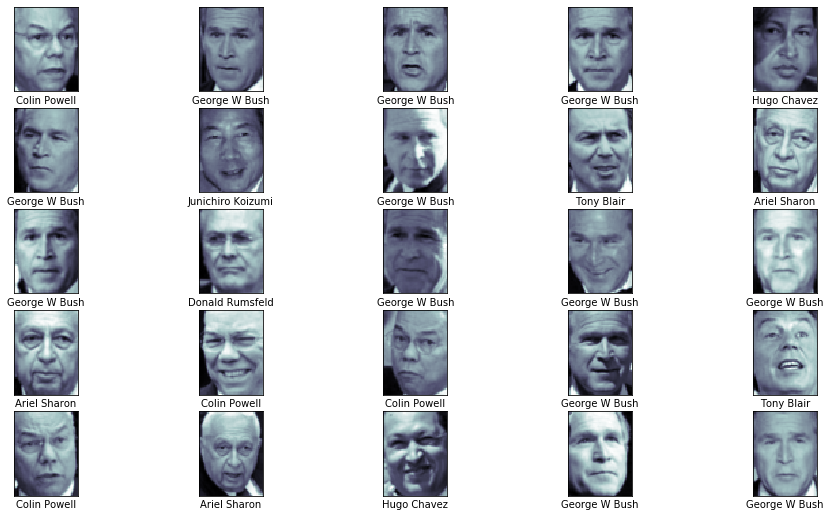

In [10]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

En tratamiento de imagenes utilizamos tecnicas de preprocesado _(esto evita que usemos cientos de pixeles en nuestro espacio vectorial)_ lo que hacemos es extraer los rasgos mas particulares
* Analisis de componentes principales

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline #tuberia en ingles

In [23]:
mi_pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")#kernel de tipo radial basic function
model = make_pipeline(mi_pca, svc)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [28]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [30]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]
}
grid = GridSearchCV(model, param_grid, cv=5)#cv=5 para esconder mensaje de alerta

%time grid.fit(Xtrain, Ytrain)

C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 1min 22s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
       

Nuestro codigo esta haciendo el trabajo sucio
* Encuentra los mejores parametros
* Hace la validacion cruzada

In [32]:
print(grid.best_params_) #muestra los mejores parametros

{'svc__C': 5, 'svc__gamma': 0.001}


Si los valores resultantes son muy cercanos a los bordes, deberiamos repetir el ejercicio ampliando hacia los lados para asegurarnos de que esos sean los parametros optimos

In [33]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

In [34]:
Xtest.shape

(337, 2914)

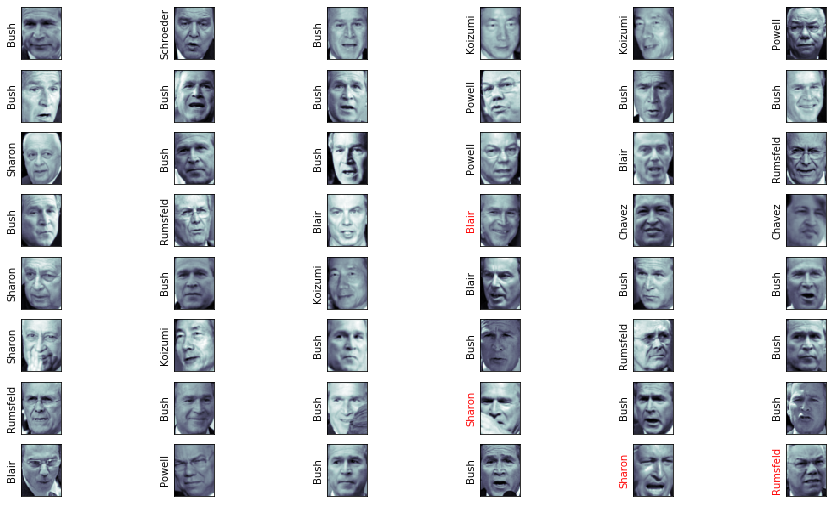

In [36]:
fig, ax = plt.subplots(8,6, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                       color = "black" if yfit[i]==Ytest[i] else "red")

Las rojas son clasificaciones erroneas

Vamos a generar un reporte de clasificacion. Que nos permite conocer que esta mal y cual fue nuestro porcentaje de exito

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(Ytest, yfit, target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.76      0.84      0.80        31
    George W Bush       0.97      0.81      0.88       126
Gerhard Schroeder       0.69      0.87      0.77        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.89      0.98      0.93        42

         accuracy                           0.85       337
        macro avg       0.82      0.87      0.83       337
     weighted avg       0.87      0.85      0.86       337



In [41]:
from sklearn.metrics import confusion_matrix

In [46]:
mat = confusion_matrix(Ytest,yfit)
mat #imprimo matrix de confusion

array([[ 13,   0,   2,   0,   0,   0,   0,   0],
       [  2,  60,   2,   3,   0,   0,   0,   1],
       [  1,   2,  26,   0,   1,   0,   0,   1],
       [  2,  10,   3, 102,   4,   2,   1,   2],
       [  0,   0,   1,   0,  20,   0,   1,   1],
       [  1,   1,   0,   0,   4,  14,   0,   0],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  1,   0,   0,   0,   0,   0,   0,  41]], dtype=int64)

In [47]:
import seaborn as sns; sns.set()

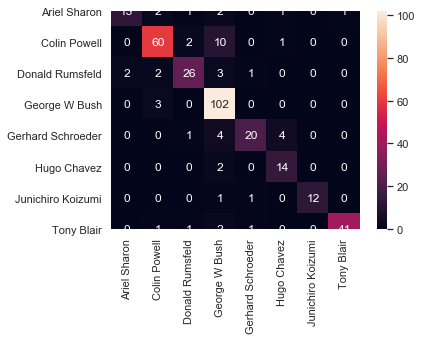

In [58]:
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=True, xticklabels=faces.target_names, 
           yticklabels=faces.target_names)

Para este ejemplo utilizamos RandomizedPCA, que extraia los datos mas caracteristicos de manera aleatoria.
En la vida real donde tenemos diferentes resoluciones de camara y muchas imagenes esto seria poco realista y deberiamos usar tecnicas mas elaboradas
* como **OpenCV**